# Analiza danych przestrzennych - ćwiczenia laboratoryjne 2023/2024

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania i oceny notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z fragmentów kodu opracowanego w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce notatnika.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu, odpowiedzi uzupełniane manualnie nie podlegają ocenie.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają na celu wyłapać podstawowe błędy. Przejście przez kod wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie i zostanie ocenione na maksymalną liczbę punktów.
- Zadania należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem). Rozmiar poziomy figur nie powinien przekraczać 20 cali.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł.
- Zakresy osi wykresów przedstawiających rozkłady punktów w przestrzeni powinny być docięte do granic obszaru, na którym został wygenerowany proces punktowy.
- Proporcje osi wykresów przedstawiających rozkłady punktów w przestrzeni powinny być dobrane tak, aby wykresy odzwierciedlały rzeczywisty rozkład punktów w przestrzeni. Nie należy osiągać tego efektu manipulując rozmiarem całej figury.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (nazwa zespołu oraz imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

---

## Zestaw zadań 6: Klasteryzacja i autokorelacja danych

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import pickle
import os
os.environ["OMP_NUM_THREADS"] = '1'
from sklearn.cluster import KMeans

In [30]:
import math

In [3]:
# Miejsce do wklejenie funkcji ze wcześniejszych zestawów zadań
# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 

### Wczytanie danych

Załączone do notatniki pliki zawierają następujące procesy punktowe:
 - `points_1` - wygenerowany dla zakresu współrzędnych X $[0, 10]$ i Y $[0, 10]$.
 - `points_2`, `points_3` - wygenerowane dla zakresu współrzędnych X $[0, 20]$ i Y $[0, 10]$
 
oraz dane wykorzystywane w zawartych w notatniku automatycznych testach.

W celu wczytania danych do notatnika umieść wszystkie pliki w tym samym folderze, w którym znajduje się notatnik.

In [16]:
# Wczytanie danych
points_1 = pd.read_pickle('points_1.pkl')
points_2 = pd.read_pickle('points_2.pkl')
points_3 = pd.read_pickle('points_3.pkl')

test_data_1 = pd.read_pickle('test_data_1.pkl')
with open("test_data_2.pkl", "rb") as file: 
    test_data_2 = pickle.load(file)

### Zadanie 1: Klasteryzacja metodą k-średnich (12 pkt)

#### a) Przygotowanie funkcji
Przygotuj funkcję `k_means_elbow_curve_test()`, która będzie wykonywała klasteryzację danych dla ustalonego zakresu liczby klastrów oraz obliczała dane niezbędne do wykreślenia wykresu typu elbow curve, na podstawie którego można podjąć decyzję na temat optymalnej liczby klastrów.

Algorytm postępowania:
 - kolejno dzielimy metodą k-średnich rozkład punktów na rosnącą liczbę klastrów z przyjętego zakresu,
 - dla każdego z podziałów zapisujemy podział punktówna klastry oraz wyliczamy średnią odległość punktów od środków klastrów do którego zostały przypisane.

Uwagi do wykonania zadania:
 - W obliczeniach skorzystaj z zaimportowanej na początku notatnika funkcji `KMeans`.

In [ ]:
def k_means_elbow_curve_test(points, number_of_clusters):
    """
    Parameters
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    number_of_clusters: list
        Lista określająca zakres testowanej liczby klastrów.
        Przykład: [1, 5]   

    Returns
    -------
    clusters: DataFrame
        Tablica zbierająca wyniki klasteryzacji w następujących kolumnach:
        - "X" - współrzędne X punktów,
        - "Y" - współrzedne Y punktów,
        - kolejne kolumny (ich liczba zależy od liczby testowanych liczebności klastrów) opisane są jako liczba klastrów,
        np. "1", "2", itd. i zawierają numery klastrów, do których zostały przyporządkowane konkretne punkty.
    elbow_curve: DataFrame
        Tablica zbierająca dane niebędne do wykonania wykresu elbow curve w dwóch kolumnach:
        - "N" - liczba klastrów,
        - "D(N)" - średnia odległość punktów od centrów klastrów, do których zostały przypisane.
    """
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
# Komórka testowa
test_clusters, test_curve = k_means_elbow_curve_test(test_data_1, [5,10])

assert type(test_clusters) == pd.DataFrame
assert test_clusters.shape == (422, 8)
assert list(test_clusters.columns) == ['X', 'Y', '5', '6', '7', '8', '9', '10']
assert np.all(np.isclose(test_clusters.values.min(axis=0), [0.00334047, 0.00208988, 0., 0., 0., 0., 0., 0.]))
assert np.all(np.isclose(test_clusters.values.max(axis=0), [9.9872809 , 9.95742835, 4., 5., 6., 7., 8., 9.]))

assert type(test_curve) == pd.DataFrame
assert test_curve.shape == (6, 2)
assert list(test_curve.columns) == ['N', 'D(N)']
assert np.all(np.isclose(test_curve["N"].values, [ 5.,  6.,  7.,  8.,  9., 10.]))
assert np.all(np.isclose(test_curve["D(N)"].values, [1.41450655, 1.23779644, 1.07175469, 0.91896647, 0.82793203, 0.77643928], rtol=1e-01, atol=1e-04))

#### b) Wygenerowanie i wizualizacja danych

Wykorzystaj przygotowaną funkcję do podzielenia na optymalną liczbę klastrów rozkładu punktów `points_1`. Dobierz zakres testowanej liczby klastrów tak, aby na wykresie elbow curve wyraźnie zaznaczał się punkt przegięcia krzywej.

Przedstaw wyniki analizy graficznie w postaci wykresu liniowego (elbow curve) oraz rozkładu punktów podzielonego na optymalną liczbę wyróżnionych kolorem klastrów. Zestaw wyniki na pojedynczej figurze (siatka wykresów 1x2).

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

### Zadanie 2: Tablica sąsiedztwa (10 pkt)

Przygotuj funkcję `spatial_weights()`, która będzie przygotowywać tablicę sąsiedztwa podobszarów dla danych zagregowanych na regularnej siatce prostokątnej.

Schemat generowania tablicy sąsiedztwa:

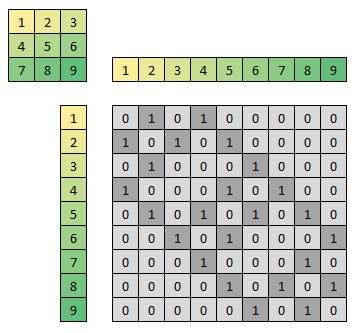

In [130]:
def spatial_weights(bin_counts):
    """
    Parameters
    -------
    bin_counts: array
        Macierz 2D z liczbą punków przypisanych do każdego z podobszarów.

    Returns
    -------
    w: array
        Macierz 2D zawierająca wagi przestrzenne.
    """    
    # YOUR CODE HERE
    raise NotImplementedError()

In [85]:
# Komórka testowa
test_w = spatial_weights(test_data_2[0])
assert test_w.shape == (12, 12)
assert np.all(np.isclose(test_w, np.array([[0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
                                           [1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
                                           [0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.],
                                           [0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
                                           [1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.],
                                           [0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.],
                                           [0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0.],
                                           [0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.],
                                           [0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.],
                                           [0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.],
                                           [0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1.],
                                           [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.]])))

### Zadanie 3: Opóźnienie przestrzenne (6 pkt)
Przygotuj funkcję `spatial_lag()`, która będzie przygotowywać tablicę wartości opóźnienia przestrzennego dla danych zagregowanych na regularnej siatce prostokątnej.

Algorytm postępowania:
1) Spłaszczamy macierz zliczeń w podobszarach.
2) Obliczamy poszczególne wartości tablicy opóźnienia przestrzennego zgodnie ze wzorem: <br/>
$ LC_{i} = \frac {\sum_j w_{ij} \cdot X_j} {\sum_j w_{ij}}$  <br/>
gdzie: $w$ - macierz sąsiedztwa, $X$ - spłaszczona macierz zliczeń w podobszarach. 
3) Konwertujemy tablicę opóźnienia przestrzennego do tych samych wymiarów jakie miała wejściowa macierz zliczeń w podobszarach.

In [133]:
def spatial_lag(binned_data):
    flatten_matrix = binned_data[0].flat
    neighbourhood_matrix = spatial_weights(binned_data[0])
    lag_array = np.zeros(len(flatten_matrix))
    for row in range(len(flatten_matrix)):
       lag_array[row] = np.sum(flatten_matrix*neighbourhood_matrix[row])/np.sum(neighbourhood_matrix[row])
    return [np.reshape(lag_array,(binned_data[0].shape[0],binned_data[0].shape[1])), binned_data[1], binned_data[2]]

In [134]:
# Komórka testowa
test_data_2_lagged = spatial_lag(test_data_2)
assert type(test_data_2_lagged) == list
assert len(test_data_2_lagged) == 3
assert np.all(np.isclose(test_data_2_lagged[0], np.array([[20.        , 59.        , 43.        , 68.        ],
                                                           [23.33333333, 26.5       , 43.75      , 44.33333333],
                                                           [13.        , 18.33333333, 33.        , 15.5       ]])))
assert np.all(np.isclose(test_data_2_lagged[1], np.array([-4., -2.,  0.,  2.,  4.])))
assert np.all(np.isclose(test_data_2_lagged[2], np.array([ 4.,  6.,  8., 10.])))

### Zadanie 4: Przygotowanie dany do wykresu Morana (2 pkt)

Przygotuj funckję `moran_plot_data()`, która będzie przygotowywać dane niezbędne do wykonania wykresu Morana.

Algorytm postępowania:
 - spłaszczamy macierz zliczeń w podobszarach i od wszystkich wartości odejmujemy ich wartość średnią,
 - spłaszczamy macierz opóźnienia przestrzennego i od wszystkich wartości odejmujemy ich wartość średnią.

In [135]:
def moran_plot_data(bin_counts, lagged_counts):
    return pd.DataFrame({"AG_STD" : bin_counts.flat-np.mean(bin_counts), "SL_STD" : lagged_counts.flat - np.mean(lagged_counts)})

In [136]:
# Komórka testowa
test_data_2_moran = moran_plot_data(test_data_2[0], test_data_2_lagged[0])
assert type(test_data_2_moran) == pd.DataFrame
assert test_data_2_moran.shape == (12, 2)
assert list(test_data_2_moran.columns) == ['AG_STD', 'SL_STD']
test_data_2_moran["AG_STD"].values
assert np.all(np.isclose(test_data_2_moran["AG_STD"].values, [ -1.33333333,  -5.33333333,  88.66666667,  14.66666667,
                                                           -23.33333333, -13.33333333,  16.66666667, -21.33333333,
                                                           -18.33333333, -19.33333333, -16.33333333,  -1.33333333]))
assert np.all(np.isclose(test_data_2_moran["SL_STD"].values, [-13.97916667,  25.02083333,   9.02083333,  34.02083333,
                                                           -10.64583333,  -7.47916667,   9.77083333,  10.35416667,
                                                           -20.97916667, -15.64583333,  -0.97916667, -18.47916667]))

### Zadanie 5: Autokorelacja danych przestrzennych (10 pkt)

Przeprowadź analizę autokorelacji rozkładów `points_2` i `points_3`. W tym celu:
- Zagreguj dane rozkładu na siatce prostokątnej ustawiając podział całego obszaru, na którym zostały wygenerowane punkty na 40 podobszarów wzdłuż osi $X$ i 20 podobszarów wzdłuż osi $Y$. 
- Wygenerowuj tablicę wag przestrzennych zagregowanych danych.
- Wylicz wartości opóźnienia przestrzennego zagregowanych danych.
- Przygotuj dane niezbędne do wykonania wykesu Morana.

Przedstaw wyniki analizy graficznie w postaci wykresów Morana zestawionych z danymi zagregowanymi oraz opóźnieniem przestrzennym przedstawionymi w postaci histogramów dwuwymiarowych z nałożonymi na nie rozkładami punktów na podstawie, których zostały wykonane.

Zestaw wyniki na pojedynczej figurze (siatka wykresów 3x2). Umieść zagreowane dane w górnym, opóźnienie przestrzenne w środkowym, a wykresy Morana w dolnym wierszu figury. Dla wszystkich histogramów ustaw tę samą skalę kolorów z identycznym zakresem wartości ustalonym na podstawie minimalnej i maksymalnej wartości zliczeń i opóźnienia przestrzennego wyznaczonej dla kompletu analizowanych rozkładów. Ustaw identyczne zakresy osi obu wykresów Morana oraz dodaj do tych wykresów osie układu współrzędnych w postaci pionowej i poziomej linii przechodzących przez początek układu współrzędnych. 

Uwagi do wykonania zadania:
- W części zadania dotyczącej agregacji danych na siatce prostokątnej nie należy pisać kodu od podstaw, a jedynie skorzystać z przygotowanej wcześniej funkcji `point_count_on_subregions()`, którą można wkleić we wskazanej komórce na początku notatnika.
- Wykres Morana to zestawienie wartości z macierzy zliczeń ustandaryzowanych poprzez odjęcie od nich ich wartości średniej (oś x) z wartościami z macierzy opóźnienia przestrzennego ustandaryzowanych poprzez odjęcie od nich ich wartości średniej (oś y) z nałożoną na nie prostą regresji.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()